In [23]:
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import wrangle as w

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [24]:
df= pd.read_csv('zillow.csv')
df.drop(columns= ['Unnamed: 0'], inplace= True)
df.head()

,yearbuilt,taxvaluedollarcnt,taxamount,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips
0,NaN,27516.0,NaN,0.0,0.0,NaN,6037.0
1,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
2,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
3,NaN,2108.0,174.21,0.0,0.0,NaN,6037.0
4,2005.0,296425.0,6941.39,4.0,2.0,3633.0,6037.0


In [25]:
train, val, test= w.wrangle_zillow()
train.shape, val.shape, test.shape, 

((1198531, 8), (513657, 8), (428047, 8))

In [26]:
train.head()

,Unnamed: 0,year_built,tax_value,taxamount,bedrooms,bathrooms,area,fips
1567873,1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0
1218138,1218138,1950.0,1345206.0,16539.04,2.0,2.0,1326.0,6037.0
339661,339661,1953.0,356648.0,4575.16,2.0,1.0,1053.0,6037.0
1017133,1017133,1946.0,175069.0,2635.51,3.0,2.0,1256.0,6037.0
40250,40250,1957.0,543000.0,6344.96,3.0,2.0,1640.0,6059.0


# Regression Explore Exercises

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [27]:
df.drop(columns= ['fips'], inplace= True)

In [28]:

def plot_variable_pairs(train):
    '''takes in the dataframe and plots all the pairwise relationships and includes a regression line'''
    
    sns.pairplot(data=df.sample(2000),kind='reg',plot_kws={'line_kws':{'color':'firebrick'}}, corner=True)
    plt.show()  

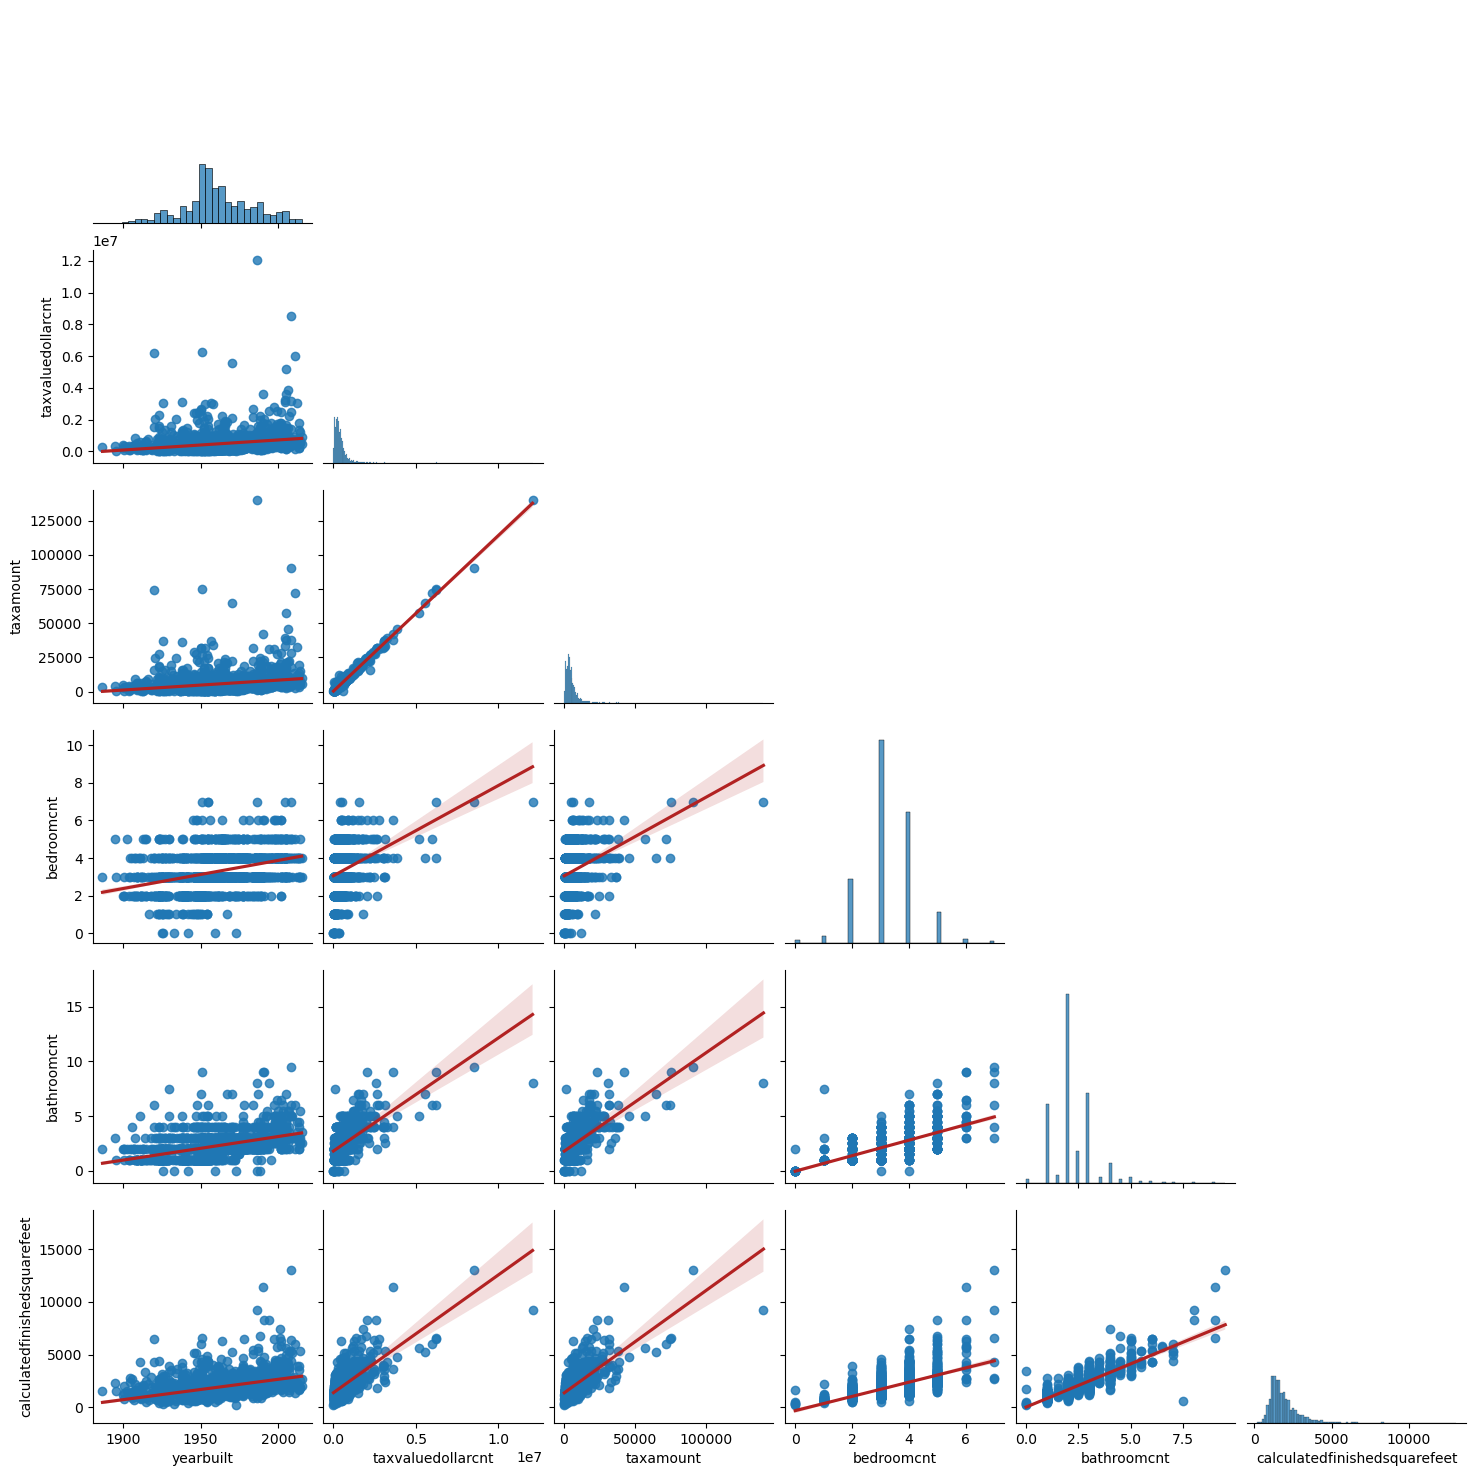

In [29]:
plot_variable_pairs(df)

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [30]:
train.drop(columns= ['Unnamed: 0'], inplace= True)

In [31]:
train.head(1)

,year_built,tax_value,taxamount,bedrooms,bathrooms,area,fips
1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0


In [43]:
cat= ['fips']
con= ['year_built', 'tax_value', 'taxamount', 'bedrooms', 'bathrooms', 'area']

In [ ]:
def plot_catagorical_and_continous_vars(df, cat, con):
    sns.stripplot()
    plt.show()
    sns.boxplot(data= df.sample(2000), x= cat, y= con)
    plt.show()
    sns.catplot(data= df.sample(2000), x= cat, y= con)

In [44]:
def plot_catagorical_and_continous_vars(df, cat, con):
    '''takes in dataframe, followed by cat value then con value to compare a catagorical and continous variable threed different ways
    stripplot, boxplot, and catplot'''
    sns.stripplot(data=df, x=cat, y=con)
    plt.show()
    sns.boxplot(data=df, x=cat, y=con)
    plt.show()
    sns.catplot(data=df, x=cat, y=con)
    plt.show()

In [45]:
plot_catagorical_and_continous_vars(train, cat, con)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

In [ ]:
train.head(1)

NULL HYPOTHESIS: There is no a relationship between property value and the year it was built (year_built)


ALTERNATIVE HYPOTHESIS: There is a relationship between property value and the year it was built (year_built)

8. Visualize all combinations of variables in some way.

In [39]:
train.head(1)

,year_built,tax_value,taxamount,bedrooms,bathrooms,area,fips
1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0


In [40]:
zill_corr= train.drop(columns=['tax_value']).corr()

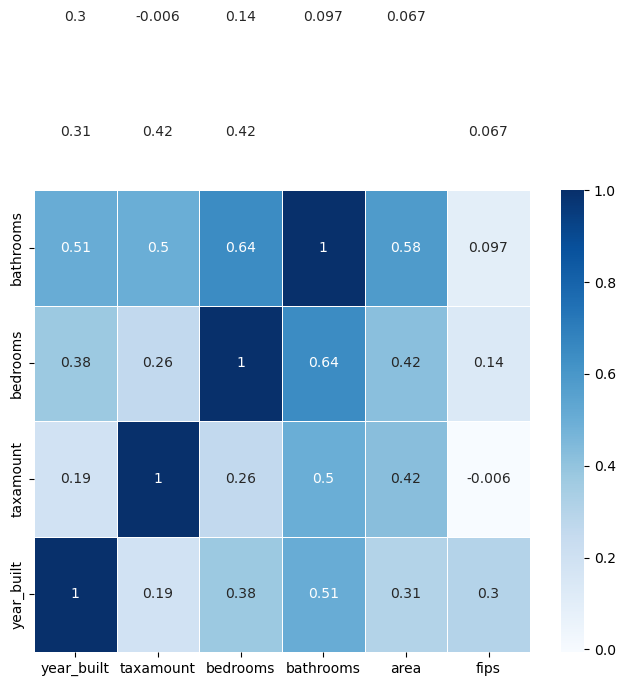

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(zill_corr, cmap='Blues', annot=True, linewidth=0.5)
plt.ylim(0, 4)

plt.show()

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.